# Интеллектуальный анализ данных – весна 2025
# Домашнее задание 6: классификация текстов

Правила:



*   Домашнее задание оценивается в 10 баллов.
*   Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.
*  Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.
*  Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.
*  Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.
* Если в задании есть вопрос на рассуждение, то за отсутствие ответа на него балл за задание будет снижен вполовину.

В этом домашнем задании вам предстоит построить классификатор текстов.

Будем предсказывать эмоциональную окраску твиттов о коронавирусе.



In [1]:
import numpy as np
import pandas as pd
from typing import  List
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation

In [2]:
df = pd.read_csv('tweets_coronavirus.csv', encoding='latin-1')
df.sample(4)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
16632,24047,68999,"Queenstown, New Zealand",24-03-2020,@Rajput_Ramesh @arunbothra @KapilMishra_IND @A...,Positive
18704,26568,71520,"Southport, Connecticut",25-03-2020,People are most definitely Comfort Eating. In ...,Positive
31614,42687,87639,"Columbus, OH",12-04-2020,Running low on food? Here are some tips for th...,Negative
8222,13788,58740,NaN,20-03-2020,People are starting that the origin of covid 1...,Extremely Negative


Для каждого твитта указано:


*   UserName - имя пользователя, заменено на целое число для анонимности
*   ScreenName - отображающееся имя пользователя, заменено на целое число для анонимности
*   Location - местоположение
*   TweetAt - дата создания твитта
*   OriginalTweet - текст твитта
*   Sentiment - эмоциональная окраска твитта (целевая переменная)



## Задание 1 Подготовка (0.5 балла)

Целевая переменная находится в колонке `Sentiment`.  Преобразуйте ее таким образом, чтобы она стала бинарной: 1 - если у твитта положительная или очень положительная эмоциональная окраска и 0 - если отрицательная или очень отрицательная.

In [3]:
df['Sentiment'].value_counts() # убедимся, что нет ничего лишнего в столбце Sentiment

Sentiment
Positive              11422
Negative               9917
Extremely Positive     6624
Extremely Negative     5481
Name: count, dtype: int64

In [4]:
# -- YOUR CODE HERE --
dff = df.copy()
dff['Sentiment'] = dff['Sentiment'].apply(lambda x: 1 if x in ['Positive', 'Extremely Positive'] else 0)
dff.sample(4)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
13535,20222,65174,"Auckland, New Zealand",22-03-2020,"With COVID-19, there are so many aspects of li...",1
30844,41734,86686,NaN,11-04-2020,2 They said that it would cause panic in the s...,0
24441,33702,78654,United States,06-04-2020,Hooper was taking no chances at his local supe...,0
20391,28680,73632,"Sidmouth, Devon",27-03-2020,Sid Vale food bank appeals for donations as co...,0


Сбалансированы ли классы?

In [5]:
# -- YOUR CODE HERE --
dist = dff['Sentiment'].value_counts()
round(dist[0] *100 / (dist[0] + dist[1]), 2), round(dist[1] *100 / (dist[0] + dist[1]), 2)

(46.04, 53.96)

**Ответ:** Распределение классов близко к распределение 50%/50%, поэтому можно сказать, что они почти сбалансированы

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их строкой 'Unknown'.

In [6]:
# -- YOUR CODE HERE --
print('Количество пропуском в каждом столбце')
print(dff.isna().sum())
dff = dff.fillna('Unknown')

Количество пропуском в каждом столбце
UserName            0
ScreenName          0
Location         7049
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64


Разделите данные на обучающие и тестовые в соотношении 7 : 3 и укажите `random_state=0`

In [106]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(dff, test_size=0.3, random_state=0)
# -- YOUR CODE HERE --

In [107]:
X_train = train['OriginalTweet']

## Задание 2 Токенизация (3 балла)

Постройте словарь на основе обучающей выборки и посчитайте количество встреч каждого токена с использованием самой простой токенизации - деления текстов по пробельным символам и приведения токенов в нижний регистр.

In [9]:
# -- YOUR CODE HERE --

token_dict = {}

for tweet in X_train:
    tokens = tweet.split()
    for t in tokens:
        if t.lower() not in token_dict:
            token_dict[t.lower()] = 0
        token_dict[t.lower()] += 1

Какой размер словаря получился?

In [10]:
# -- YOUR CODE HERE --
print('Размер словаря:', len(token_dict))

Размер словаря: 79755


Выведите 10 самых популярных токенов с количеством встреч каждого из них. Объясните, почему именно эти токены в топе.

In [11]:
# -- YOUR CODE HERE --

sorted_dict = sorted(token_dict.items(), key=lambda x: x[1], reverse=True)
print('10 самых популярных токенов')
for t, n in sorted_dict[:10]:
    print(f'{t}: {n}')

10 самых популярных токенов
the: 26815
to: 23373
and: 14684
of: 13012
a: 11737
in: 11198
for: 8566
#coronavirus: 8223
is: 7383
are: 7050


**Ответ:** 
* `the` и `а`- артикли в английском языки, которые обязательно используются перед существительными в большинстве случаев 
* `to` - используется как часть инфинитива, а также играет роль предлога
* `and`- основной союз для соединения слов и предложений
* `of`, `in`, `for`- предлоги
* `#coronavirus` - хештег, напрямую связанный с темой твитов
* `is` и `are` - формы глагола "to be", часто используемые для утверждения

Удалите стоп-слова из словаря и выведите новый топ-10 токенов (и количество встреч) по популярности.  Что можно сказать  о нем?

In [12]:
# nltk.download("stopwords", quiet=True)

In [13]:
import nltk
from nltk.corpus import stopwords

# -- YOUR CODE HERE --
stops = stopwords.words("english")
nostop_tokens = {}
for t, n in token_dict.items():
    if t not in stops:
        nostop_tokens[t] = n

In [14]:
sorted_dict_nostop = sorted(nostop_tokens.items(), key=lambda x: x[1], reverse=True)
print('10 самых популярных токенов')
for t, n in sorted_dict_nostop[:10]:
    print(f'{t}: {n}')

10 самых популярных токенов
#coronavirus: 8223
prices: 3891
food: 3820
grocery: 3469
supermarket: 3288
people: 3175
covid-19: 3173
store: 3155
#covid19: 2471
&amp;: 2314


**Ответ:**  теперь преобладает потребительская тема: `prices`, `food`, `grocery`, `supermarket`, `store`, `consumer`. Также хештеги и упоминания самой темы твитов: `#coronavirus`, `covid-19`, `#covid19`. Что-то непонятно, не похожее на слово встречается часто: `&amp;`

Также выведите 20 самых непопулярных слов (если самых непопулярных слов больше, выведите любые 20 из них) Почему эти токены непопулярны, требуется ли как-то дополнительно работать с ними?

In [15]:
# -- YOUR CODE HERE --
print('20 самых непопулярных токенов')
for t, n in sorted_dict_nostop[-20:]:
    print(f'{t}: {n}')

20 самых непопулярных токенов
skellig: 1
coast!: 1
closer!): 1
@skelligsix18: 1
#skelligcoast2kms: 1
#southkerry: 1
https://t.co/zjcl195vqs: 1
@srinivasiyc: 1
https://t.co/iaek4fwsgz: 1
premiership: 1
non-playing: 1
subsidise: 1
playersãâ: 1
renewing: 1
wage!: 1
flew: 1
nothing...: 1
@torontopearson: 1
@680news: 1
https://t.co/7j2y3rsld9: 1


**Ответ:** непопулярные токены подразделяются на следующие
* уникальные ссылки, оставляемые пользователями, например, `https://t.co/zjcl195vqs`
* слова, содержащие знаки препинания: поскольку мы делили только по пробелам, некоторые знаки препинания "прилипли" к словам, что выдало ряд уникальных токенов, например, `coast!` или `closer!)`
* также в непопулярные слова попала редкая и специфическая лексика: `non-playing`, `skellig`
* отметка пользователей: `@srinivasiyc`, `@torontopearson`

Необходимо дополнительно обработать эти токены, особенно те, что со знаками препинания, ведь они не несут дополнительных слов

Теперь воспользуемся токенайзером получше - TweetTokenizer из библиотеки nltk. Примените его и посмотрите на топ-10 популярных слов. Чем он отличается от топа, который получался раньше? Почему?

In [16]:
from nltk.tokenize import TweetTokenizer

tw_dict = {}

tw = TweetTokenizer()
for tweet in X_train:
    tokens = tw.tokenize(tweet)
    for t in tokens:
        if t not in tw_dict:
            tw_dict[t] = 0
        tw_dict[t] += 1

tw_dict_sort = sorted(tw_dict.items(), key=lambda x: x[1], reverse=True)
print('10 самых популярных токенов')
for t, n in tw_dict_sort[:10]:
    print(f'{t}: {n}')

10 самых популярных токенов
the: 24337
.: 24118
to: 22933
,: 17571
and: 14354
of: 12904
a: 11045
in: 10573
?: 9524
for: 8228


**Ответ:** также в числе популярных токенов остались артикли и предлоги. Ушел хэштег `#coronavirus`. Однако теперь появились знаки препинания: `.`, `,`, `?`. В топе раньше пунктационных знаков не было, поскольку они были "приклеины" к словам и потому составляли часть токенов, здесь же они являются отдельными токенами. 

Удалите из словаря стоп-слова и пунктуацию, посмотрите на новый топ-10 слов с количеством встреч, есть ли теперь в нем что-то не похожее на слова?

In [17]:
from string import punctuation

stops = stopwords.words("english")
clean_tw = {}
for t, n in tw_dict.items():
    if t not in stops and t not in punctuation:
        clean_tw[t] = n

In [18]:
clean_tw_sort = sorted(clean_tw.items(), key=lambda x: x[1], reverse=True)
print('10 самых популярных токенов')
for t, n in clean_tw_sort[:10]:
    print(f'{t}: {n}')

10 самых популярных токенов
Â: 7415
: 7311
19: 7167
#coronavirus: 7143
I: 5235
: 4372
prices: 4281
COVID: 4218
food: 3795
store: 3691


**Ответ:** теперь в числе топов оказались следующие токены: `â`, `` - это специальные симоволы, которые не являются словами и могли возникнуть при неправильной обработке. Также токен `19` оказался в числе популярных, так TweetTokenizer отделил 19 от токенов `covid19` и `covid-19`. 

Скорее всего в некоторых топах были неотображаемые символы или отдельные буквы не латинского алфавита. Уберем их: удалите из словаря токены из одного символа, позиция которого в таблице Unicode 128 и более (`ord(x) >= 128`)

Выведите топ-10 самых популярных и топ-20 непопулярных слов. Чем полученные топы отличаются от итоговых топов, полученных при использовании токенизации по пробелам? Что теперь лучше, а что хуже?

In [19]:
new_tw = {}

for t, n in clean_tw.items(): 
    if not (len(t) == 1 and ord(t) >= 128):
        new_tw[t] = n

In [20]:
new_tw_sort = sorted(new_tw.items(), key=lambda x: x[1], reverse=True)
print('10 самых популярных токенов')
for t, n in new_tw_sort[:10]:
    print(f'{t}: {n}')

10 самых популярных токенов
19: 7167
#coronavirus: 7143
I: 5235
prices: 4281
COVID: 4218
food: 3795
store: 3691
supermarket: 3373
grocery: 3083
people: 3047


In [21]:
print('20 самых непопулярных токенов')
for t, n in new_tw_sort[-20:]:
    print(f'{t}: {n}')

20 самых непопулярных токенов
ruins: 1
now.When: 1
milion: 1
Skellig: 1
@SkelligSix18: 1
#SkelligCoast2kms: 1
#SouthKerry: 1
https://t.co/zJcL195VQS: 1
@srinivasiyc: 1
https://t.co/IAEK4fWsgz: 1
Vile: 1
premiership: 1
non-playing: 1
subsidise: 1
playersÃ: 1
renewing: 1
flew: 1
@TorontoPearson: 1
@680NEWS: 1
https://t.co/7j2Y3rSld9: 1


**Ответ:** 
* TweetTokenizer не учел регистр, хотя это можно сделать, добавив параметр `preserve_case=False`
* В отличие от обычной токенизации, TweetTokenizer сразу разделяет знаки препинания, "отлипляя" их от слов. Хотя в тоже время не совсем удачно он отделил 19 от токенов `covid19` и `covid-19`

Выведите топ-10 популярных хештегов (токены, первые символы которых - #) с количеством встреч. Что можно сказать о них?

In [22]:
# -- YOUR CODE HERE --
count = 0
print('10 самых популярных хештегов')
for t, n in new_tw_sort:
    if t[0] == '#' and count < 10:
        print(f'{t}: {n}')
        count += 1

10 самых популярных хештегов
#coronavirus: 7143
#COVID19: 1844
#Covid_19: 1463
#Coronavirus: 1281
#COVID2019: 927
#toiletpaper: 657
#covid19: 568
#COVID: 542
#CoronaCrisis: 426
#CoronaVirus: 351


**Ответ:** все хештеги из топ-10, за исключением одного, указывают на короновирус, причем самый популярный `#coronavirus`. Также среди хештегов можно увидеть одну из проблем, возникших во время пандемии, - спрос на туалетную бумагу (`#toiletpaper`).

То же самое проделайте для ссылок на сайт https://t.co Сравнима ли популярность ссылок с популярностью хештегов? Будет ли информация о ссылке на конкретную страницу полезна?

In [23]:
# -- YOUR CODE HERE --
count = 0
print('10 самых популярных ссылок')
for t, n in new_tw_sort:
    if t.startswith('https://t.co') and count < 10:
        print(f'{t}: {n}')
        count += 1

10 самых популярных ссылок
https://t.co/oXA7SWtoNd: 5
https://t.co/gP3EusapL8: 4
https://t.co/DefTruI1PfÃÂ: 3
https://t.co/WrLHYzIzAA: 3
https://t.co/kuwIpF1KQW: 3
https://t.co/zjNRx6dKKN: 3
https://t.co/3GBBDpdjat: 3
https://t.co/e2ZNXajPre: 3
https://t.co/CATKegAyOY: 3
https://t.co/G63RP042HO: 3


**Ответ:** нет, употребление ссылок гораздо меньше (даже 10-ый по популярности хештег встречается гораздо чаще, чем первая по популярности ссылка). Сами ссылки будут скорее незначимы для общих выводов из-за низкой частоты использования

Используем опыт предыдущих экспериментов и напишем собственный токенайзер, улучшив TweetTokenizer. Функция tokenize должна:



*   Привести текст в нижний регистр
*   Применить TweetTokenizer для  выделения токенов
*   Удалить стоп-слова, пунктуацию, токены из одного символа с позицией в таблице Unicode 128 и более,  ссылки на t.co



In [24]:
def custom_tokenizer(text):
    
    import nltk
    from nltk.corpus import stopwords
    stops = stopwords.words("english")
    
    from string import punctuation
    
    tokens = []
    
    text = text.lower()
    tw = TweetTokenizer()
    tok = tw.tokenize(text)
    for t in tok: 
        if t not in stops and t not in punctuation and not (len(t)==1 and ord(t) >= 128) and not t.startswith('https://t.co'):
            tokens.append(t)
    return tokens


In [25]:
custom_tokenizer('This is sample text!!!! @Sample_text I, \x92\x92 https://t.co/sample  #sampletext')

['sample', 'text', '@sample_text', '#sampletext']

## Задание 3 Векторизация текстов (2 балла)

Обучите CountVectorizer с использованием custom_tokenizer в качестве токенайзера. Как размер полученного словаря соотносится с размером изначального словаря из начала задания 2?

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(tokenizer=custom_tokenizer) # -- YOUR CODE HERE --
X_train_cv = cv.fit_transform(X_train)

print(len(cv.vocabulary_))

C:\Users\User\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


45290


**Ответ:** полученный словарь почти в два раза меньше, чем изначальный из задания 2

Посмотрим на какой-нибудь конкретный твитт:

In [27]:
ind = 9023
train.iloc[ind]['OriginalTweet'], train.iloc[ind]['Sentiment']

('Nice one @SkyNews lets not panic but show ppl in france queueing for food!!! #CoronavirusOutbreak #COVID2019 brainless!! Ffs',
 0)

Автор твитта не доволен ситуацией с едой во Франции и текст имеет резко негативную окраску.

Примените обученный CountVectorizer для векторизации данного текста, и попытайтесь определить самый важный токен и самый неважный токен (токен, компонента которого в векторе максимальна/минимальна, без учета 0). Хорошо ли они определились, почему?

In [28]:
tweet3 = train.iloc[ind]['OriginalTweet']
tw3 = cv.transform([tweet3])

tokens = cv.get_feature_names_out()
counts = tw3.toarray()[0]

t_counts = dict(zip(tokens, counts))

In [29]:
most_important = max(t_counts.items(), key=lambda x: x[1])

non_zero = {}
for t, w in t_counts.items(): 
    if w > 0:
        non_zero[t] = w
least_important = min(non_zero.items(), key=lambda x: x[1])

most_important, least_important 

(('#coronavirusoutbreak', 1), ('#coronavirusoutbreak', 1))

**Ответ:** поскольку каждый токен встречается ровно 1 раз в твите, то мы не можем определить его важность по количеству попаданий в твит

Теперь примените TfidfVectorizer и  определите самый важный/неважный токены. Хорошо ли определились, почему?

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer(tokenizer=custom_tokenizer)
tfidf_vec.fit(X_train)

tw33 = tfidf_vec.transform([tweet3])

tokens = tfidf_vec.get_feature_names_out()
weights = tw33.toarray()[0]
t_weights = dict(zip(tokens, weights))

non_zero_tfidf = {}
for t, w in t_weights.items(): 
    if w > 0:
        non_zero_tfidf[t] = w
        
most_important = max(non_zero_tfidf.items(), key=lambda x: x[1])
least_important = min(non_zero_tfidf.items(), key=lambda x: x[1])
print(f'Самый важный токен: {most_important}')
print(f'Самый неважный токен: {least_important}')

Самый важный токен: ('brainless', 0.3867641170466375)
Самый неважный токен: ('food', 0.11328893069250721)


**Ответ:**
* Самый важный токен - `brainless`, что не совсем точно, потому что он выражает явный негатив, но не передает сути твита
* Самый неважный токен - `food`, что тоже некорректно, ведь это ключевой объект обсуждения

Найдите какой-нибудь положительно окрашенный твитт, где TfidfVectorizer хорошо (полезно для определения окраски) выделяет важный токен, поясните пример.

*Подсказка:* явно положительные твитты можно искать при помощи положительных слов (good, great, amazing и т. д.)

In [31]:
train[train['OriginalTweet'].apply(lambda x: 'wonderful' in x) & (train['Sentiment'] == 1)]

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
20160,28380,73332,London/Dorking,26-03-2020,"@caitlinmoran Brilliant, but how about showing...",1
5274,10212,55164,"London, England",19-03-2020,So grateful to @POTAGELONDON today. Not only w...,1
3747,8344,53296,VA,18-03-2020,Sad sign of the times: Just before the alarm w...,1
19432,27458,72410,ADHS 67 Algonquin Civil 70,26-03-2020,Please be aware and give everyone their space ...,1
31953,43102,88054,"Scotland, United Kingdom",12-04-2020,I understand and get the wonderful job the sup...,1
2587,6928,51880,UK,18-03-2020,Just what to say what a wonderful job @AldiUK ...,1
22910,31792,76744,United Kingdom,04-04-2020,amp are often most impacted by cirisis yet mos...,1
10014,15960,60912,Unknown,21-03-2020,With US grocery store shelves empty of TP Toil...,1
22786,31645,76597,"Madison, WI, US, 53719",03-04-2020,Stickley furniture is built to withstand gener...,1
14975,22007,66959,Unknown,23-03-2020,. I spoke to local business owners hillside Av...,1


In [32]:
tweet_3 = train.loc[5274]['OriginalTweet']
tweet_3

'So grateful to @POTAGELONDON today. Not only was I able to get a yummy meal for a Team Dana The Trainer COVID-19 Strategy meeting, I was also able to get eggs. Seriously we had been to 5 grocery stores. No eggs. Their pantry store is a wonderful idea!'

In [33]:
tw_3 = tfidf_vec.transform([tweet_3])

tokens = tfidf_vec.get_feature_names_out()
weights = tw_3.toarray()[0]
t_weights = dict(zip(tokens, weights))

non_zero_tfidf = {}
for t, w in t_weights.items(): 
    if w > 0:
        non_zero_tfidf[t] = w
        
most_important = max(non_zero_tfidf.items(), key=lambda x: x[1])
least_important = min(non_zero_tfidf.items(), key=lambda x: x[1])
print(f'Самый важный токен: {most_important}')
print(f'Самый неважный токен: {least_important}')

Самый важный токен: ('eggs', 0.35529588291382613)
Самый неважный токен: ('19', 0.06179350931415395)


**Ответ:** Здесь как раз важный токен `eggs`, поскольку половина твита посвящена тому, что пользователь смог найти яйца в определнном месте, когда их не было в других. В то же время самый неважный токен - `19`, что является правдой, ведь этот токен идет с упоминанием короновируса, которое встречается чуть ли не в каждом твите, ведь это тема всего датасета.

## Задание 4 Обучение первых моделей (1 балл)

Примените оба векторайзера для получения матриц с признаками текстов.  Выделите целевую переменную.

In [34]:
X_test = test['OriginalTweet']
y_test = test['Sentiment']

In [35]:
cv = CountVectorizer(tokenizer=custom_tokenizer)
X_train_cv4 = cv.fit_transform(X_train)
X_test_cv4 = cv.transform(X_test)

tfidf_vec = TfidfVectorizer(tokenizer=custom_tokenizer)
X_train_tfidf4 = tfidf_vec.fit_transform(X_train)
X_test_tfidf4 = tfidf_vec.transform(X_test)     

C:\Users\User\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [36]:
y_train = train['Sentiment']

In [37]:
print("CountVectorizer матрица:", X_train_cv4.shape)
print("TfidfVectorizer матрица:", X_train_tfidf4.shape)
print("Целевая переменная:", y_train.shape)

CountVectorizer матрица: (23410, 45290)
TfidfVectorizer матрица: (23410, 45290)
Целевая переменная: (23410,)


Обучите логистическую регрессию на векторах из обоих векторайзеров. Посчитайте долю правильных ответов на обучающих и тестовых данных. Какой векторайзер показал лучший результат? Что можно сказать о моделях?

Используйте `sparse` матрицы (после векторизации), не превращайте их в `numpy.ndarray` или `pd.DataFrame` - может не хватить памяти.

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_cv = LogisticRegression()
lr_cv.fit(X_train_cv4, y_train)

lr_tfidf = LogisticRegression()
lr_tfidf.fit(X_train_tfidf4, y_train)

y_train_pred_cv = lr_cv.predict(X_train_cv4)
y_test_pred_cv = lr_cv.predict(X_test_cv4)

y_train_pred_tfidf = lr_tfidf.predict(X_train_tfidf4)
y_test_pred_tfidf = lr_tfidf.predict(X_test_tfidf4)

a_train_cv = accuracy_score(y_train, y_train_pred_cv)
a_test_cv = accuracy_score(y_test, y_test_pred_cv)

a_train_tfidf = accuracy_score(y_train, y_train_pred_tfidf)
a_test_tfidf = accuracy_score(y_test, y_test_pred_tfidf)

print("CountVectorizer:")
print(f"  Обучающая выборка: {round(a_train_cv, 4)}")
print(f"  Тестовая выборка: {round(a_test_cv, 4)}")

print("\nTfidfVectorizer:")
print(f"  Обучающая выборка: {round(a_train_tfidf, 4)}")
print(f"  Тестовая выборка: {round(a_test_tfidf, 4)}")

# -- YOUR CODE HERE --

CountVectorizer:
  Обучающая выборка: 0.9847
  Тестовая выборка: 0.8671

TfidfVectorizer:
  Обучающая выборка: 0.9224
  Тестовая выборка: 0.8528


**Ответ:** на тестовой и на обучающей выборке лучшее качество показал `CountVectorizer` 

## Задание 5 Стемминг (0.5 балла)

Для уменьшения словаря можно использовать стемминг.

Модифицируйте написанный токенайзер, добавив в него стемминг с использованием SnowballStemmer. Обучите Count- и Tfidf- векторайзеры. Как изменился размер словаря?

In [39]:
def custom_stem_tokenizer(text):
    import nltk
    from nltk.corpus import stopwords
    stops = stopwords.words("english")
    
    from nltk.stem.snowball import SnowballStemmer
    stemmer = SnowballStemmer('english')
    
    from string import punctuation
    
    tokens = []
    
    text = text.lower()
    tw = TweetTokenizer()
    tok = tw.tokenize(text)
    for t in tok: 
        if t not in stops and t not in punctuation and not (len(t)==1 and ord(t) >= 128) and not t.startswith('https://t.co'):
            tokens.append(stemmer.stem(t))
    return tokens

In [40]:
custom_stem_tokenizer('This is sample text!!!! @Sample_text I, \x92\x92 https://t.co/sample  #sampletext adding more words to check stemming')

['sampl', 'text', '@sample_text', '#sampletext', 'ad', 'word', 'check', 'stem']

In [41]:
cv5 = CountVectorizer(tokenizer=custom_stem_tokenizer)
X_train_cv5 = cv5.fit_transform(X_train)
X_test_cv5 = cv5.transform(X_test)

tfidf_vec5 = TfidfVectorizer(tokenizer=custom_stem_tokenizer)
X_train_tfidf5 = tfidf_vec5.fit_transform(X_train)
X_test_tfidf5 = tfidf_vec5.transform(X_test)     

print(f'CountVectorizer: {len(cv5.vocabulary_)}')
print(f'TfidfVectorizer: {len(tfidf_vec5.vocabulary_)}')

C:\Users\User\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer: 36634
TfidfVectorizer: 36634


**Ответ**: Размер словаря уменьшился на 8656

Обучите логистическую регрессию с использованием обоих векторайзеров. Изменилось ли качество? Есть ли смысл применять стемминг?

In [42]:
# -- YOUR CODE HERE --
lr_cv5 = LogisticRegression()
lr_cv5.fit(X_train_cv5, y_train)

lr_tfidf5 = LogisticRegression()
lr_tfidf5.fit(X_train_tfidf5, y_train)

y_train_pred_cv5 = lr_cv5.predict(X_train_cv5)
y_test_pred_cv5 = lr_cv5.predict(X_test_cv5)

y_train_pred_tfidf5 = lr_tfidf5.predict(X_train_tfidf5)
y_test_pred_tfidf5 = lr_tfidf5.predict(X_test_tfidf5)

a_train_cv5 = accuracy_score(y_train, y_train_pred_cv5)
a_test_cv5 = accuracy_score(y_test, y_test_pred_cv5)

a_train_tfidf5 = accuracy_score(y_train, y_train_pred_tfidf5)
a_test_tfidf5 = accuracy_score(y_test, y_test_pred_tfidf5)

print("CountVectorizer:")
print(f"  Обучающая выборка: {round(a_train_cv5, 4)}")
print(f"  Тестовая выборка: {round(a_test_cv5, 4)}")

print("\nTfidfVectorizer:")
print(f"  Обучающая выборка: {round(a_train_tfidf5, 4)}")
print(f"  Тестовая выборка: {round(a_test_tfidf5, 4)}")

CountVectorizer:
  Обучающая выборка: 0.972
  Тестовая выборка: 0.8675

TfidfVectorizer:
  Обучающая выборка: 0.9166
  Тестовая выборка: 0.856


**Ответ:** На тестовой выборке на обоих векторайзеров качество увеличилось, тогда как на обучающей снизилось, что говорит о снижении переобучения. Хотя улучшения и неогромные, стемминг имеет смысл

## Задание  6 Работа с частотами (1.5 балла)

Еще один способ уменьшить количество признаков - это использовать параметры min_df и max_df при построении векторайзера  эти параметры помогают ограничить требуемую частоту встречаемости токена в документах.

По умолчанию берутся все токены, которые встретились хотя бы один раз.



*У меня ранее получился словарь размером 36634, насколько я поняла, это потому что недавно был обновлен список стоп-слов, а дз составлялось раньше, поэтому я подкорректировала задание ниже: заменила 36651 на 36633*

Подберите max_df такой, что размер словаря будет 36633 (на 1 меньше, чем было). Почему параметр получился такой большой/маленький?

In [43]:
dfs = np.arange(0.1, 1.1, 0.1)
res = 0

for i in dfs:
    cv_df = CountVectorizer(tokenizer=custom_stem_tokenizer,
                            max_df=i).fit(X_train)
    if len(cv_df.vocabulary_) == 36633:
        res = i
        break
print(res)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


0.30000000000000004


In [44]:
cv_df = CountVectorizer(tokenizer=custom_stem_tokenizer,
                        max_df=0.3 # -- YOUR CODE HERE --
                        ).fit(X_train
                            # -- YOUR CODE HERE --
                            )
print(len(cv_df.vocabulary_))

36633


**Ответ:** удалилось слово, которое встретилось в >30% твитов, скорее всего - это что-то связанное с короновирусом, что логично, что в большей части твитов есть это слово

Подберите min_df (используйте дефолтное значение max_df) в CountVectorizer таким образом, чтобы размер словаря был 3687 токенов (при использовании токенайзера со стеммингом), а качество осталось таким же, как и было. Что можно сказать о результатах?

In [45]:
dfs_min = np.arange(0.0001, 0.0005, 0.00005)
res = 0

for i in dfs_min:
    cv_df = CountVectorizer(tokenizer=custom_stem_tokenizer,
                            min_df=i).fit(X_train)
    if len(cv_df.vocabulary_) == 3687:
        res = i
        break
print(res)

0.00045000000000000004


In [46]:
cv_df = CountVectorizer(tokenizer=custom_stem_tokenizer,
                        min_df= 0.00045 # -- YOUR CODE HERE --
                        ).fit(X_train
                            # -- YOUR CODE HERE --
                            )
print(len(cv_df.vocabulary_))

3687


In [47]:
X_test_cv_df = cv_df.transform(X_test)
X_train_cv_df = cv_df.transform(X_train)

lr_cv_df = LogisticRegression()
lr_cv_df.fit(X_train_cv_df, y_train)

y_train_pred_cv_df = lr_cv_df.predict(X_train_cv_df)
y_test_pred_cv_df = lr_cv_df.predict(X_test_cv_df)

a_train_cv_df = accuracy_score(y_train, y_train_pred_cv_df)
a_test_cv_df = accuracy_score(y_test, y_test_pred_cv_df)

print("CountVectorizer:")
print(f"  Обучающая выборка: {round(a_train_cv_df, 4)}")
print(f"  Тестовая выборка: {round(a_test_cv_df, 4)}")

CountVectorizer:
  Обучающая выборка: 0.929
  Тестовая выборка: 0.868


**Ответ:** удалены токены, которые встречались не больше, чем в 0,045% твитов, что уменьшило словарь почти в 10 раз

В предыдущих заданиях признаки не скалировались. Отскалируйте данные (при словаре размера 3.7 тысяч, векторизованные CountVectorizer), обучите логистическую регрессию, посмотрите качество и выведите `barplot`, содержащий по 10 токенов, с наибольшим по модулю положительными/отрицательными весами. Что можно сказать об этих токенах?

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train_7 = scaler.fit_transform(X_train_cv_df)
X_test_7 = scaler.transform(X_test_cv_df)

In [49]:
lr7 = LogisticRegression()
lr7.fit(X_train_7, y_train)

y_train_pred_7 = lr7.predict(X_train_7)
y_test_pred_7 = lr7.predict(X_test_7)

a_train_7 = accuracy_score(y_train, y_train_pred_7)
a_test_7 = accuracy_score(y_test, y_test_pred_7)

print("CountVectorizer:")
print(f"  Обучающая выборка: {round(a_train_7, 4)}")
print(f"  Тестовая выборка: {round(a_test_7, 4)}")

CountVectorizer:
  Обучающая выборка: 0.9415
  Тестовая выборка: 0.8447


In [50]:
lr7.coef_

array([[-0.00641424, -0.0032301 ,  0.06935512, ...,  0.00162241,
         0.01269754,  0.0104295 ]])

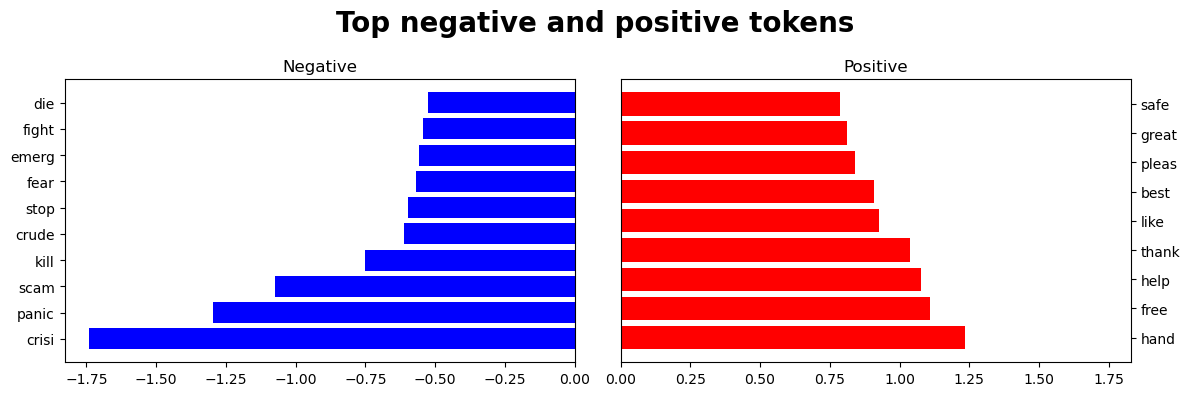

In [154]:
coefs = pd.DataFrame({'token': cv_df.get_feature_names_out(), 'coef': lr7.coef_[0]})
coef_sorted = coefs.sort_values(by='coef')

top_positive = coef_sorted[:-10:-1]
top_negative = coef_sorted[:10]

max_abs = max(abs(top_negative['coef'].min()), abs(top_positive['coef'].max()))

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plt.suptitle('Top negative and positive tokens', fontsize=20, weight='bold')

ax[0].barh(top_negative['token'], width=top_negative['coef'], color='blue')
ax[0].set_title('Negative')
ax[0].set_xlim(-max_abs*1.05, 0)

ax[1].barh(top_positive['token'], width=top_positive['coef'], color='red')
ax[1].yaxis.tick_right()
ax[1].set_title('Positive')
ax[1].set_xlim(0, max_abs*1.05)

plt.tight_layout()
plt.show()

**Ответ:** 
* В числе "отрицательных" токенов можем найти те, что связаны с угрозами, страхом: crisi, panic, kill, crude, die
* В числе "положительных" токенов можем найти те, что связаны с безопасностью и поддержкой: safe, pleas, help, thank, free, hand
* Как и ожидалось, многие токены усечены в результате стемминга

## Задание 7 Другие признаки (1.5 балла)

Мы были сконцентрированы на работе с текстами твиттов и не использовали другие признаки - имена пользователя, дату и местоположение

Изучите признаки UserName и ScreenName. полезны ли они? Если полезны, то закодируйте их, добавьте к матрице с отскалированными признаками, обучите логистическую регрессию, замерьте качество.

In [52]:
# -- YOUR CODE HERE --
df['ScreenName'].value_counts(), df['UserName'].value_counts()

(ScreenName
 48752    1
 76003    1
 76001    1
 75999    1
 75998    1
         ..
 62272    1
 62271    1
 62270    1
 62269    1
 89907    1
 Name: count, Length: 33444, dtype: int64,
 UserName
 3800     1
 31051    1
 31049    1
 31047    1
 31046    1
         ..
 17320    1
 17319    1
 17318    1
 17317    1
 44955    1
 Name: count, Length: 33444, dtype: int64)

**Ответ:** признаки UserName и ScreenName совсем не информативны, поскольку просто показывают авторов твитов, причем только номера. Более того все номера уникальны, поэтому эти признаки ничего нам не дают.

Изучите признак TweetAt в обучающей выборке: преобразуйте его к типу datetime и нарисуйте его гистограмму с разделением по цвету на основе целевой переменной. Полезен ли он? Если полезен, то закодируйте его, добавьте к матрице с отскалированными признаками, обучите логистическую регрессию, замерьте качество.

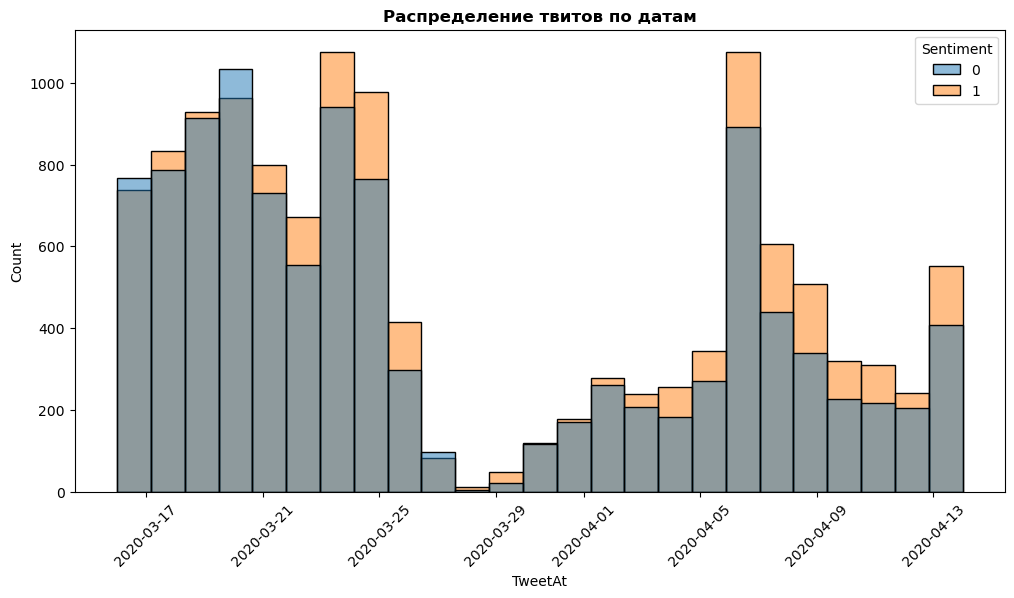

In [108]:
# -- YOUR CODE HERE --
train['TweetAt'] = pd.to_datetime(train['TweetAt'], dayfirst=True)

plt.figure(figsize=(12, 6))
sns.histplot(data=train, x='TweetAt', hue='Sentiment')
plt.title('Распределение твитов по датам', weight='bold')
plt.xticks(rotation=45)
plt.show()

In [109]:
train['day_of_week'] = train['TweetAt'].dt.dayofweek 
train['day'] = train['TweetAt'].dt.day 
train['month'] = train['TweetAt'].dt.month   

test['TweetAt'] = pd.to_datetime(test['TweetAt'], dayfirst=True)
test['day_of_week'] = test['TweetAt'].dt.dayofweek 
test['day'] = test['TweetAt'].dt.day 
test['month'] = test['TweetAt'].dt.month  

In [110]:
from scipy.sparse import hstack, csr_matrix
features = ['day_of_week', 'day', 'month']
X_train_date = hstack([X_train_7, csr_matrix(train[features])])
X_test_date = hstack([X_test_7, csr_matrix(test[features])])

In [85]:
lr_date = LogisticRegression()
lr_date.fit(X_train_date, y_train)

y_train_pred_date = lr_date.predict(X_train_date)
y_test_pred_date = lr_date.predict(X_test_date)

a_train_date = accuracy_score(y_train, y_train_pred_date)
a_test_date = accuracy_score(y_test, y_test_pred_date)

print(f"Обучающая выборка: {round(a_train_date, 4)}")
print(f"Тестовая выборка: {round(a_test_date, 4)}")

Обучающая выборка: 0.9413
Тестовая выборка: 0.8451


**Ответ:** По скольку в определенные дни одних отзывов больше чем других, будет интересно посмотреть регрессию с этим признаком. Не берем год в кодирование, поскольку он везеде одинаковый. Качество на тесте немного улучшилось, а на обучающей немного снизилось

Поработайте с признаком Location в обучающей выборке. Сколько уникальных значений?

In [111]:
print('Уникальных значений:', train['Location'].nunique())

Уникальных значений: 7949


Постройте гистограмму топ-10 по популярности местоположений (исключая Unknown)

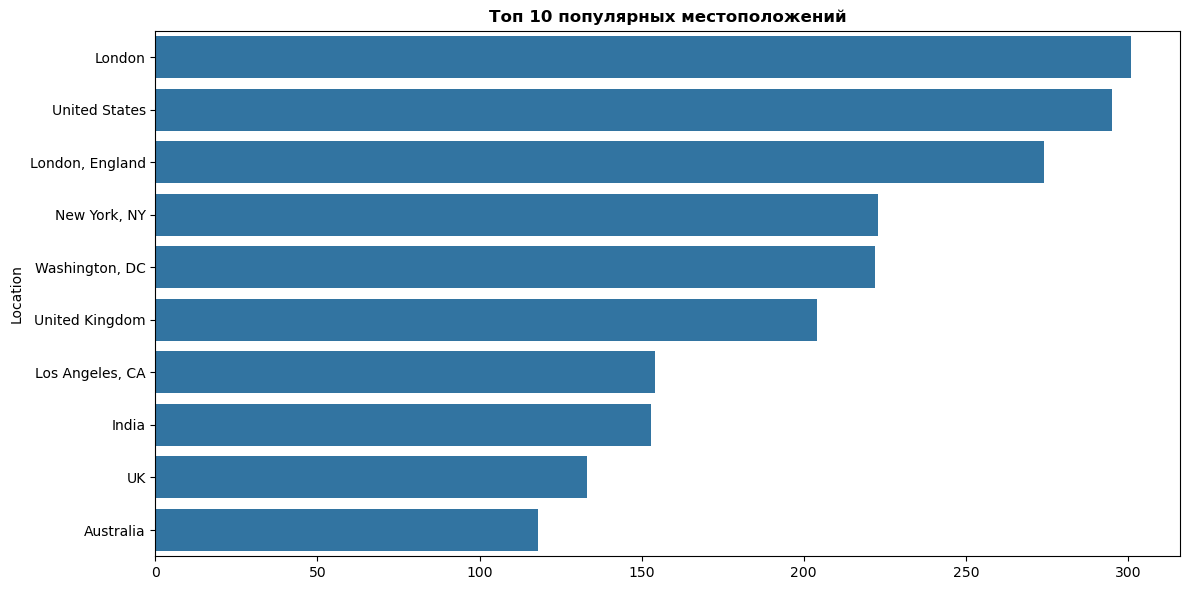

In [112]:
filt_loc = train[train['Location'] != 'Unknown']['Location']
loc_10 = filt_loc.value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=loc_10.values, y=loc_10.index)
plt.title('Топ 10 популярных местоположений', weight='bold')

plt.tight_layout()
plt.show()

Видно, что многие местоположения включают в себя более точное название места, чем другие (Например, у некоторых стоит London, UK; а у некоторых просто UK или United Kingdom).

Создайте новый признак WiderLocation, который содержит самое широкое местоположение (например, из London, UK должно получиться UK). Сколько уникальных категорий теперь? Постройте аналогичную гистограмму.

In [113]:
def wider_location(loc):
    uk = [l.lower() for l in ['London', 'England', 'Cambridge', 'United Kingdom', 'UK', 'Ireland', 'Scotland', 'Manchester', 'Birmingham', 'Glasgow','Bristol', 'Edinburgh']]
    usa = [l.lower() for l in ['New York', 'Raleigh', 'Cleveland', 'Oklahoma City', 'Florida', 'Phoenix', 'Nashville', 'Nashville', 'Minneapolis', 'New York City', 'NY', 'Washington', 'Los Angeles', 'USA', 'Chicago', 'IL', 'Toronto', 'Ontario', 'California', 'San Francisco', 'Boston', 'Atlanta', 'Texas', 'Austin', 'TX', 'Houston', 'Philadelphia', 'San Diego', 'Dallas', 'Seattle', 'Brooklyn', 'Las Vegas', 'New Jersey', 'Denver', 'NYC', 'Virginia', 'Michigan', 'Miami', 'Indianapolis', 'North Carolina', 'Sacramento', 'Portland', 'Tampa', 'Detroit', 'Arlington', 'Oakland', 'Georgia', 'San Jose', 'Charlotte', 'Cincinnati', 'Maryland', 'Orlando', 'Illinois', 'Pittsburgh']]
    india = [l.lower() for l in ['India', 'New Delhi', 'Mumbai', 'Bengaluru', 'Hyderabad', 'Bangalore']]
    australia = [l.lower() for l in ['Australia', 'Melbourne', 'Victoria', 'Sydney', 'Adelaide']]
    world = [l.lower() for l in ['Global', 'Worldwide', 'Earth', 'Planet Earth', 'Everywhere']]
    canada = [l.lower() for l in ['Canada', 'Vancouver', 'Calgary', 'Alberta']]
    nigeria = [l.lower() for l in ['Nigeria']]
    kenya = [l.lower() for l in ['Nairobi', 'Kenya']]
    singapore = [l.lower() for l in ['Singapore']]
    new_zealand = [l.lower() for l in ['New Zealand']]
    south_africa = [l.lower() for l in ['South Africa', 'Cape Town', 'Johannesburg']]
    pakistan = [l.lower() for l in ['Pakistan', 'Karachi']]
    france = [l.lower() for l in ['Paris', 'France']]
    uae = [l.lower() for l in ['Dubai', 'United Arab Emirates']]
    malaysia = [l.lower() for l in ['Malaysia']]
    
    loc_spl = loc.split(', ')
    for i in loc_spl:
        i = i.lower()
        if i in uk:
            return 'UK'
        if i in usa:
            return 'USA'
        if i in india:
            return 'India'
        if i in australia:
            return 'Australia'
        if i in world:
            return 'World'
        if i in canada:
            return 'Canada'
        if i in nigeria:
            return 'Nigeria'
        if i in kenya:
            return 'Kenya'
        if i in singapore:
            return 'Singapore'
        if i in new_zealand:
            return 'New Zealand'
        if i in south_africa:
            return 'South Africa'
        if i in pakistan:
            return 'Pakistan'
        if i in france:
            return 'France'
        if i in uae:
            return 'UAE'
        if i in malaysia: 
            return 'Malaysia'
    return loc

In [114]:
train['WiderLocation'] = train['Location'].apply(wider_location)
print('Уникальных категорий:', train['WiderLocation'].nunique())

Уникальных категорий: 6135


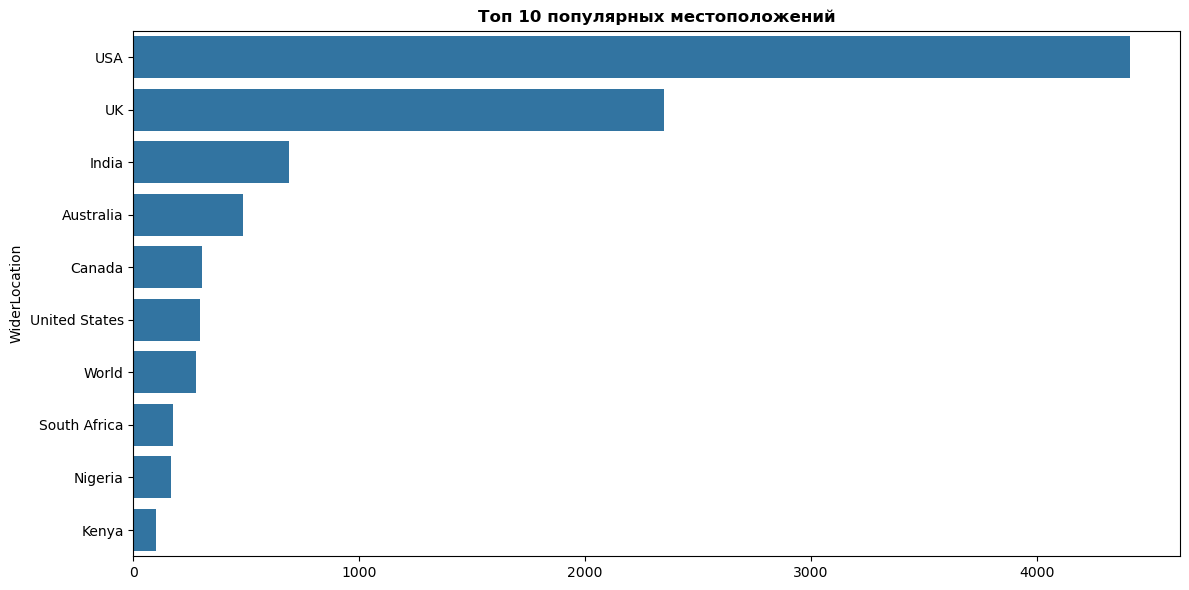

In [115]:
filt_loc2 = train[train['WiderLocation'] != 'Unknown']['WiderLocation']
loc_102 = filt_loc2.value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=loc_102.values, y=loc_102.index)
plt.title('Топ 10 популярных местоположений', weight='bold')

plt.tight_layout()
plt.show()

Закодируйте признак WiderLocation с помощью OHE таким образом, чтобы создались только столбцы для местоположений, которые встречаются более одного раза. Сколько таких значений?


In [142]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(min_frequency=2, handle_unknown='ignore')
ohe_train = encoder.fit_transform(train[['WiderLocation']])
ohe_test = encoder.transform(test[['WiderLocation']])

In [143]:
print(f'Уникальных значений: {ohe_train.shape[1]}')

Уникальных значений: 1078


Добавьте этот признак к матрице отскалированных текстовых признаков, обучите логистическую регрессию, замерьте качество. Как оно изменилось? Оказался ли признак полезным?


*Подсказка:* используйте параметр `categories` в энкодере.

In [145]:
X_train_final = hstack([X_train_7, ohe_train])
X_test_final = hstack([X_test_7, ohe_test])

In [150]:
lr_final = LogisticRegression()
lr_final.fit(X_train_final, y_train)

y_train_pred_final = lr_final.predict(X_train_final)
y_test_pred_final = lr_final.predict(X_test_final)

a_train_final = accuracy_score(y_train, y_train_pred_final)
a_test_final = accuracy_score(y_test, y_test_pred_final)

print(f"Обучающая выборка: {round(a_train_final, 4)}")
print(f"Тестовая выборка: {round(a_test_final, 4)}")

Обучающая выборка: 0.9443
Тестовая выборка: 0.8446


C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Ответ:** на обучающей выборке качество совсем немного упало, тогда как на тестовой подросло, что может говорить о снижении переобучения. Этом может говорить о том, что признак оказался полезным